In [41]:
import json
import re

In [42]:
file_path = '../data/mushroom_data_merged.json'


with open(file_path, 'r') as f:
    data = json.load(f)

In [43]:
# Print number of entries
print(f"Number of entries in the dataset: {len(data)}")

# Print all unique keys that exist in the dataset
unique_keys = set()
for entry in data:
    unique_keys.update(entry.keys())
print(f"Unique keys in the dataset: {unique_keys}")

# See all unique keys that exist inside the mycomorphbox key
mycomorphbox_keys = set()
for entry in data:
    if 'mycomorphbox' in entry:
        mycomorphbox_keys.update(entry['mycomorphbox'].keys())
print(f"Unique keys in 'mycomorphbox': {mycomorphbox_keys}")

Number of entries in the dataset: 1161
Unique keys in the dataset: {'article', 'text', 'views_all_time', 'mycomorphbox', 'mushroom', 'speciesbox', 'id', 'wiki_links', 'taxonomy'}
Unique keys in 'mycomorphbox': {'hymeniumType', 'name', 'capShape', 'howEdible', 'ecologicalType', 'stipeCharacter', 'sporePrintColor', 'whichGills'}


In [44]:

morphology_attributes = ['sporePrintColor', 'stipeCharacter', 'name', 'capShape', 'hymeniumType', 'howEdible', 'ecologicalType', 'whichGills']
for i in morphology_attributes:
    attribute_options = set()
    for entry in data:
        if 'mycomorphbox' in entry and i in entry['mycomorphbox']:
            attribute_options.add(entry['mycomorphbox'][i])
    print(f"{len(attribute_options)} Unique options for '{i}': {attribute_options}")

60 Unique options for 'sporePrintColor': {'Spore print is purple', 'Spore print is purple-black', 'Spore print is white\n   to pink', 'Spore print is purple\n   to brown', 'Spore print is brown\n   to purple', 'Spore print is tan\n   to yellow', 'Spore print is buff', 'Spore print is cream\n   to buff', 'Spore print is blackish-brown', 'Spore print is yellow-brown', 'Spore print is olive\n   to brown', 'Spore print is brown\n   to blackish-brown', 'Spore print is cream\n   to yellow', 'Spore print is white\n   to yellow', 'Spore print is ochre\n   to brown', 'Spore print is brown\n   to purple-brown', 'Spore print is yellow\n   to white', 'Spore print is yellow\n   to ochre', None, 'Spore print is pink\n   to salmon', 'Spore print is white\n   to buff', 'Spore print is olive', 'Spore print is pinkish-brown', 'Spore print is ochre', 'Spore print is pink\n   to pinkish-brown', 'Spore print is blackish-brown\n   to purple', 'Spore print is blackish-brown\n   to black', 'Spore print is pin

In [45]:
# Print number of entries that has a 'mycomorphbox' key
mycomorphbox_count = sum(1 for entry in data if 'mycomorphbox' in entry)
print(f"Number of entries with 'mycomorphbox': {mycomorphbox_count}")

# Print number of entries that has each morphology attribute
for i in morphology_attributes:
    count = sum(1 for entry in data if 'mycomorphbox' in entry and i in entry['mycomorphbox'])
    print(f"Number of entries with '{i}': {count}")

Number of entries with 'mycomorphbox': 1101
Number of entries with 'sporePrintColor': 1101
Number of entries with 'stipeCharacter': 1101
Number of entries with 'name': 1101
Number of entries with 'capShape': 1101
Number of entries with 'hymeniumType': 1101
Number of entries with 'howEdible': 1101
Number of entries with 'ecologicalType': 1101
Number of entries with 'whichGills': 1101


In [46]:
# We need to clean all the morphology attributes, so we can use the for the network later. We start with sporePrintColor.

attribute = "sporePrintColor"
for i in range(1000):
    if 'mycomorphbox' not in data[i]:
        continue
    value = data[i]['mycomorphbox'][attribute]
    if value is None:
        data[i]['mycomorphbox'][attribute] = []
        continue
    # Remove "Spore print is" from the string
    cleaned_color = value.replace("Spore print is ", "").strip()
    # Remove newline characters
    cleaned_color = cleaned_color.replace("\n", "").strip()

    # Split by comma, -, " to ", " " and keep the list
    cleaned_color = [x.strip() for x in re.split(r',|-| to | ', cleaned_color) if x.strip()]
    data[i]['mycomorphbox'][attribute] = cleaned_color    

In [47]:
# We need to clean all the morphology attributes, so we can use the for the network later. Now we do capShape.
attribute = 'capShape'
for i in range(1000):
    if 'mycomorphbox' not in data[i]:
        continue
    value = data[i]['mycomorphbox'][attribute]
    if value is None:
        data[i]['mycomorphbox'][attribute] = []
        continue

    # Remove "Cap is" from the string
    value = value.replace("Cap is ", "").strip()
    # Remove newline characters
    value = value.replace("\n", "").strip()

    # Remove "or"
    value = value.replace(" or ", "")

    # Split by comma, -, " to ", " " and keep the list
    value = [x.strip() for x in re.split(r',|-| to | ', value) if x.strip()]

    data[i]['mycomorphbox'][attribute] = value

In [48]:
# We need to clean all the morphology attributes, so we can use the for the network later. Now we do stipeCharacter.

attribute = 'stipeCharacter'
for i in range(1000):
    if 'mycomorphbox' not in data[i]:
        continue
    value = data[i]['mycomorphbox'][attribute]
    if value is None:
        data[i]['mycomorphbox'][attribute] = []
        continue
    value = value.replace("Stipe is ", "").strip()
    value = value.replace("Stipe has a ", "").strip()
    value = value.replace("\n", "").strip()
    value = value.replace("or is", "").strip()
    value = value.replace("and", "").strip()
    value = value.replace("or has a", "").strip()
    value = value.replace("or", "").strip()

    # Remove word and text after "Lacks a"
    value = re.split(r'Lacks a', value)[0].strip()
    value = re.split(r'lacks a', value)[0].strip()

    # Split by comma, -, " to ", " " and keep the list
    value = [x.strip() for x in re.split(r',|-| to | ', value) if x.strip()]

    data[i]['mycomorphbox'][attribute] = value

In [49]:
# We need to clean all the morphology attributes, so we can use the for the network later. Now we do capShape.
attribute = 'hymeniumType'
for i in range(1000):
    if 'mycomorphbox' not in data[i]:
        continue
    value = data[i]['mycomorphbox'][attribute]
    if value is None:
        data[i]['mycomorphbox'][attribute] = []
        continue

    # Remove "Hymenium is" from the string
    value = value.replace("Hymenium is ", "").strip()
    # Remove "or"
    value = value.replace(" or ", "")

    # Remove "Hymenium attachment is irregularnot applicable"
    value = value.replace("Hymenium attachment is irregularnot applicable", "").strip()
    # Remove "Hymenium attachment is not applicable"
    value = value.replace("Hymenium attachment is not applicable", "").strip()

    # Split by comma, -, " to ", " " and keep the list
    value = [x.strip() for x in re.split(r',|-| to | ', value) if x.strip()]

    data[i]['mycomorphbox'][attribute] = value

In [50]:
# We need to clean all the morphology attributes, so we can use the for the network later. Now we do capShape.
attribute = 'howEdible'
for i in range(1000):
    if 'mycomorphbox' not in data[i]:
        continue
    value = data[i]['mycomorphbox'][attribute]
    if value is None:
        data[i]['mycomorphbox'][attribute] = []
        continue
    # Remove "Edibility is" from the string
    value = value.replace("Edibility is ", "").strip()
    # Remove "unknown"
    value = value.replace("unknown", "").strip()
    # Remove "or"
    # Remove "but"
    value = value.replace(" but ", "")
    # Replace edible with " edible " but not in words like inedible
    value = re.sub(r'(?<!in)(edible)', ' edible ', value).strip()
    # Replace poisonous with " poisonous "
    value = value.replace("poisonous", " poisonous ").strip()
    # Replace psychoactive with " psychoactive "
    value = value.replace("psychoactive", " psychoactive ").strip()
    # Remove can cause
    value = value.replace("or ", "")
    value = re.sub(r'can cause [a-zA-Z ,]+', '', value).strip()

    # Replace "not recommended" with "not_recommended"
    value = value.replace("not recommended", "not_recommended").strip()

    # Replace too hard to eat with "too_hard_to_eat"
    value = value.replace("too hard to eat", "too_hard_to_eat").strip()

    # Split by comma, -, " to ", " " and keep the list
    value = [x.strip() for x in re.split(r',|-| to | ', value) if x.strip()]

    data[i]['mycomorphbox'][attribute] = value

In [51]:
# We need to clean all the morphology attributes, so we can use the for the network later. Now we do capShape.
attribute = 'whichGills'
for i in range(1000):
    if 'mycomorphbox' not in data[i]:
        continue
    value = data[i]['mycomorphbox'][attribute]
    if value is None:
        data[i]['mycomorphbox'][attribute] = []
        continue
    data[i]['mycomorphbox'][attribute] = [value]

In [52]:
attribute = "ecologicalType"

for i in range(1000):
    if 'mycomorphbox' not in data[i]:
        continue
    value = data[i]['mycomorphbox'][attribute]
    if value is None:
        data[i]['mycomorphbox'][attribute] = []
        continue
    # Remove "Ecology is" from the string
    value = value.replace("Ecology is ", "").strip()

    # Remove "or"
    value = value.replace(" or ", "")

    # Split by comma, -, " to ", " " and keep the list
    value = [x.strip() for x in re.split(r',|-| to | ', value) if x.strip()]
    data[i]['mycomorphbox'][attribute] = value

In [53]:
attribute = "conservation_status"

for i in range(1000):
    if 'speciesbox' not in data[i]:
        continue
    value = data[i]['speciesbox'][attribute]
    if value is None:
        data[i]['speciesbox'][attribute] = []
        continue
    
    # Split by comma, -, " to ", " " and keep the list
    value = [x.strip() for x in re.split(r',|-| to | ', value) if x.strip()]
    data[i]['speciesbox'][attribute] = value

In [54]:
import networkx as nx
from itertools import combinations

In [67]:
# Make a network using networkx, where each node is mushroom from the dataset.
# The following attributes from the data should be added to each node:
# ["mycomorphbox"]["sporePrintColor"]
# ["mycomorphbox"]["stipeCharacter"]
# ["mycomorphbox"]["capShape"]
# ["mycomorphbox"]["hymeniumType"]
# ["mycomorphbox"]["ecologicalType"]
# ["mycomorphbox"]["whichGills"]
# ["speciesbox"]["conservation_status"]
# ["mushroom"]
# ["id"]
# ["views_all_time"]
# ["article"]
# ["speciesbox"]["image"]

G = nx.Graph()

for entry in data:
    if "mycomorphbox" not in entry or "speciesbox" not in entry:
        continue
    node_id = entry.get("id")

    # Extract attributes safely
    myco = entry.get("mycomorphbox", {})
    speciesbox = entry.get("speciesbox", {})

    attrs = {
        "mushroom": entry.get("mushroom"),
        "id": node_id,
        "views_all_time": entry.get("views_all_time"),
        "article": entry.get("article"),
        "sporePrintColor": myco.get("sporePrintColor"),
        "stipeCharacter": myco.get("stipeCharacter"),
        "capShape": myco.get("capShape"),
        "hymeniumType": myco.get("hymeniumType"),
        "ecologicalType": myco.get("ecologicalType"),
        "whichGills": myco.get("whichGills"),
        "conservation_status": speciesbox.get("conservation_status"),
        "image": speciesbox.get("image")
    }

    G.add_node(node_id, **attrs)

# Example: inspect attributes for one node
print(G.nodes[data[0]["id"]])


{'mushroom': 'Russula maculata', 'id': 1, 'views_all_time': 9897, 'article': 'https://en.wikipedia.org/wiki/Russula_maculata', 'sporePrintColor': ['yellow', 'ochre'], 'stipeCharacter': ['bare'], 'capShape': ['convex', 'depressed'], 'hymeniumType': ['adnexed', 'free'], 'ecologicalType': ['mycorrhizal'], 'whichGills': ['Gills on hymenium'], 'conservation_status': [], 'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/1996-02-15_Russula_maculata_Qu%C3%A9l._%26_Roze_117.jpg/250px-1996-02-15_Russula_maculata_Qu%C3%A9l._%26_Roze_117.jpg'}


In [68]:
# Print number of nodes and edges in the graph
print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

Number of nodes in the graph: 1101
Number of edges in the graph: 0


In [ ]:
# Now create edges based on shared traits

ATTRS = [
    "sporePrintColor",
    "stipeCharacter",
    "capShape",
    "hymeniumType",
    "ecologicalType",
    "whichGills",
    "conservation_status"
]

for id1, id2 in combinations(G.nodes, 2):
    n1 = G.nodes[id1]
    n2 = G.nodes[id2]

    weight = 0

    for attr in ATTRS:
        list1 = n1.get(attr, [])
        list2 = n2.get(attr, [])

        # skip empty lists
        if not list1 or not list2:
            continue

        # count overlaps
        overlap = set(list1).intersection(list2)
        weight += len(overlap)

    if weight > 0:
        G.add_edge(id1, id2, weight=weight)

print("Finished building network")
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())


Finished building network
Nodes: 1101
Edges: 336024


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyvis.network import Network

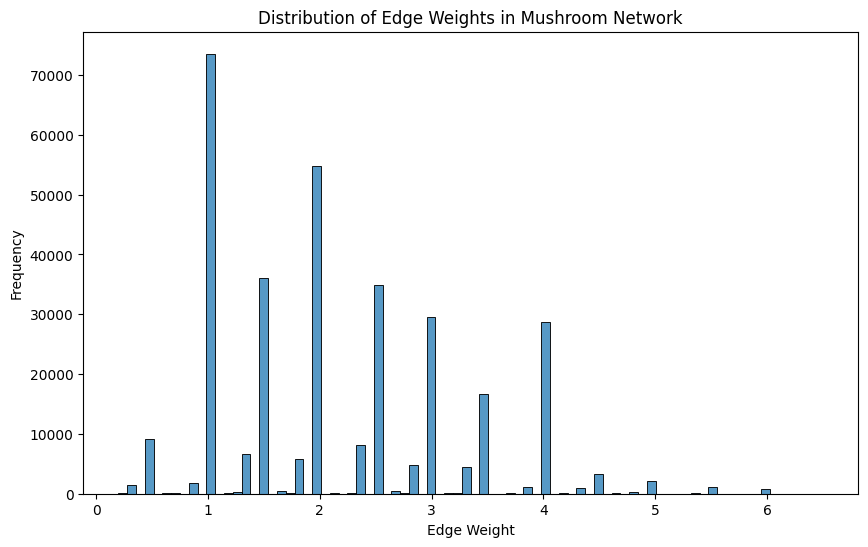

In [91]:
# Make a nice seaborn histogram of the edge weights in the network
edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
plt.figure(figsize=(10, 6))
sns.histplot(edge_weights, bins=80, kde=False)
plt.title('Distribution of Edge Weights in Mushroom Network')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.show()

In [92]:
# Print histogram data
hist, bin_edges = np.histogram(edge_weights, bins=20)
for edge, count in zip(bin_edges, hist):
    print(f"Edge Weight: {np.round(edge)}, Count: {count}")

Edge Weight: 0.0, Count: 10762
Edge Weight: 1.0, Count: 159
Edge Weight: 1.0, Count: 75384
Edge Weight: 1.0, Count: 7042
Edge Weight: 1.0, Count: 36577
Edge Weight: 2.0, Count: 60662
Edge Weight: 2.0, Count: 8449
Edge Weight: 2.0, Count: 35323
Edge Weight: 3.0, Count: 34409
Edge Weight: 3.0, Count: 4580
Edge Weight: 3.0, Count: 16751
Edge Weight: 4.0, Count: 1346
Edge Weight: 4.0, Count: 28800
Edge Weight: 4.0, Count: 4146
Edge Weight: 5.0, Count: 282
Edge Weight: 5.0, Count: 2095
Edge Weight: 5.0, Count: 1252
Edge Weight: 6.0, Count: 1
Edge Weight: 6.0, Count: 736
Edge Weight: 6.0, Count: 2


In [93]:
threshold = 10
H = nx.Graph((u, v, d) for u, v, d in G.edges(data=True) if d["weight"] >= threshold)


In [94]:
# Print number of nodes and edges in the graph
print(f"Number of nodes in the graph: {H.number_of_nodes()}")
print(f"Number of edges in the graph: {H.number_of_edges()}")

Number of nodes in the graph: 0
Number of edges in the graph: 0


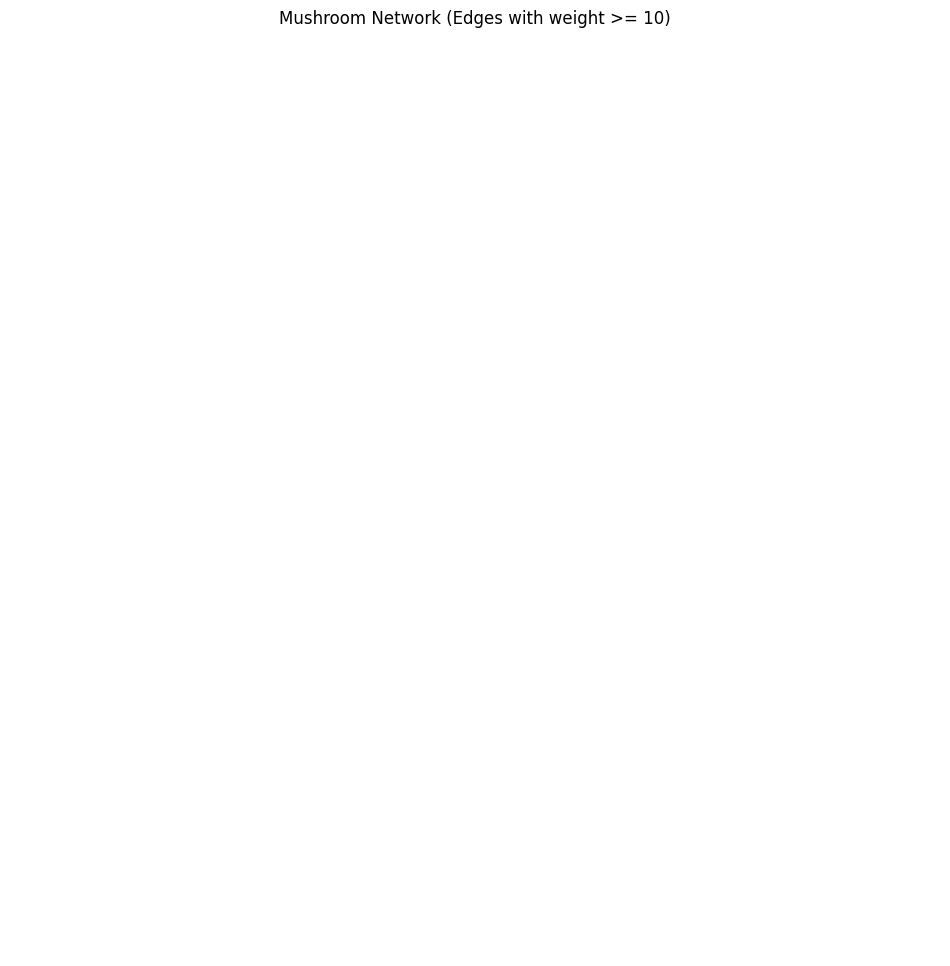

In [95]:
# Plot the network using spring layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(H, k=0.15, iterations=20)
edge_weights = [d['weight'] for u, v, d in H.edges(data=True)]
nx.draw_networkx_nodes(H, pos, node_size=50, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(H, pos, width=[w * 0.2 for w in edge_weights], alpha=0.5)
plt.title(f'Mushroom Network (Edges with weight >= {threshold})')
plt.axis('off')
plt.show()

In [96]:
# Make a network using networkx, where each node is mushroom from the dataset.
# The following attributes from the data should be added to each node:
# ["mycomorphbox"]["sporePrintColor"]
# ["mycomorphbox"]["stipeCharacter"]
# ["mycomorphbox"]["capShape"]
# ["mycomorphbox"]["hymeniumType"]
# ["mycomorphbox"]["ecologicalType"]
# ["mycomorphbox"]["whichGills"]
# ["speciesbox"]["conservation_status"]
# ["mushroom"]
# ["id"]
# ["views_all_time"]
# ["article"]
# ["speciesbox"]["image"]

G = nx.Graph()

for entry in data:
    if "mycomorphbox" not in entry or "speciesbox" not in entry:
        continue
    node_id = entry.get("id")

    # Extract attributes safely
    myco = entry.get("mycomorphbox", {})
    speciesbox = entry.get("speciesbox", {})

    attrs = {
        "mushroom": entry.get("mushroom"),
        "id": node_id,
        "views_all_time": entry.get("views_all_time"),
        "article": entry.get("article"),
        "sporePrintColor": myco.get("sporePrintColor"),
        "stipeCharacter": myco.get("stipeCharacter"),
        "capShape": myco.get("capShape"),
        "hymeniumType": myco.get("hymeniumType"),
        "ecologicalType": myco.get("ecologicalType"),
        "whichGills": myco.get("whichGills"),
        "conservation_status": speciesbox.get("conservation_status"),
        "image": speciesbox.get("image")
    }

    G.add_node(node_id, **attrs)

# Example: inspect attributes for one node
print(G.nodes[data[0]["id"]])


{'mushroom': 'Russula maculata', 'id': 1, 'views_all_time': 9897, 'article': 'https://en.wikipedia.org/wiki/Russula_maculata', 'sporePrintColor': ['yellow', 'ochre'], 'stipeCharacter': ['bare'], 'capShape': ['convex', 'depressed'], 'hymeniumType': ['adnexed', 'free'], 'ecologicalType': ['mycorrhizal'], 'whichGills': ['Gills on hymenium'], 'conservation_status': [], 'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/1996-02-15_Russula_maculata_Qu%C3%A9l._%26_Roze_117.jpg/250px-1996-02-15_Russula_maculata_Qu%C3%A9l._%26_Roze_117.jpg'}


In [97]:
# Build edges using sum of Jaccard similarities across attributes


for id1, id2 in combinations(G.nodes, 2):
    n1 = G.nodes[id1]
    n2 = G.nodes[id2]

    total_jaccard = 0

    for attr in ATTRS:
        val1 = n1.get(attr)
        val2 = n2.get(attr)

        # Force None or non lists to empty lists
        if not isinstance(val1, list):
            val1 = []
        if not isinstance(val2, list):
            val2 = []

        list1 = set(val1)
        list2 = set(val2)


        if not list1 or not list2:
            continue

        intersection = list1.intersection(list2)
        union = list1.union(list2)
        j = len(intersection) / len(union)

        total_jaccard += j

    # threshold to avoid enormous density
    if total_jaccard > 0:
        G.add_edge(id1, id2, weight=total_jaccard)


In [98]:
# Print number of nodes and edges in the graph
print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

Number of nodes in the graph: 1101
Number of edges in the graph: 328758


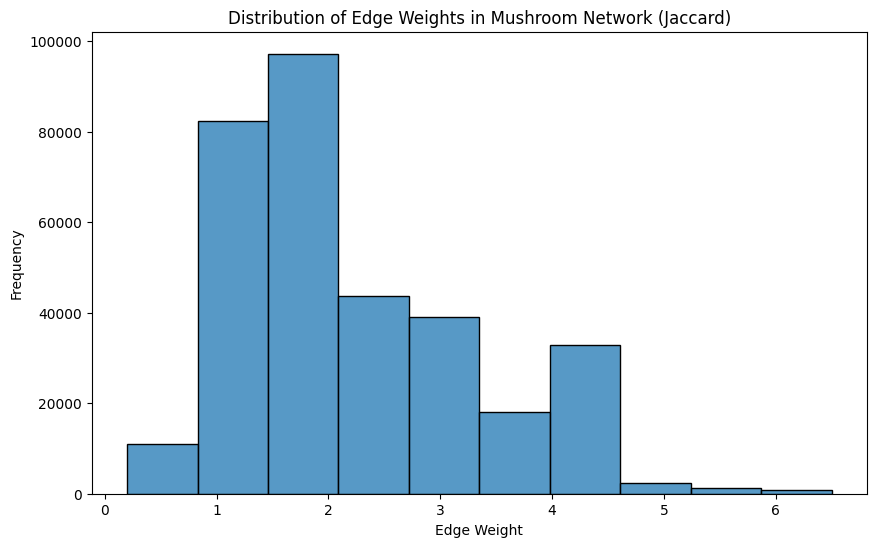

In [99]:
# Print distribution of edge weights
edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
plt.figure(figsize=(10, 6))
sns.histplot(edge_weights, bins=10, kde=False)
plt.title('Distribution of Edge Weights in Mushroom Network (Jaccard)')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.show()

In [100]:
threshold = 5
H = nx.Graph((u, v, d) for u, v, d in G.edges(data=True) if d["weight"] >= threshold)

In [88]:
# print number of nodes and edges in the graph
print(f"Number of nodes in the graph: {H.number_of_nodes()}")
print(f"Number of edges in the graph: {H.number_of_edges()}")

Number of nodes in the graph: 452
Number of edges in the graph: 4086


(-1.0025752296740822,
 1.1285952194096989,
 -1.1888982057679578,
 0.9879287368913652)

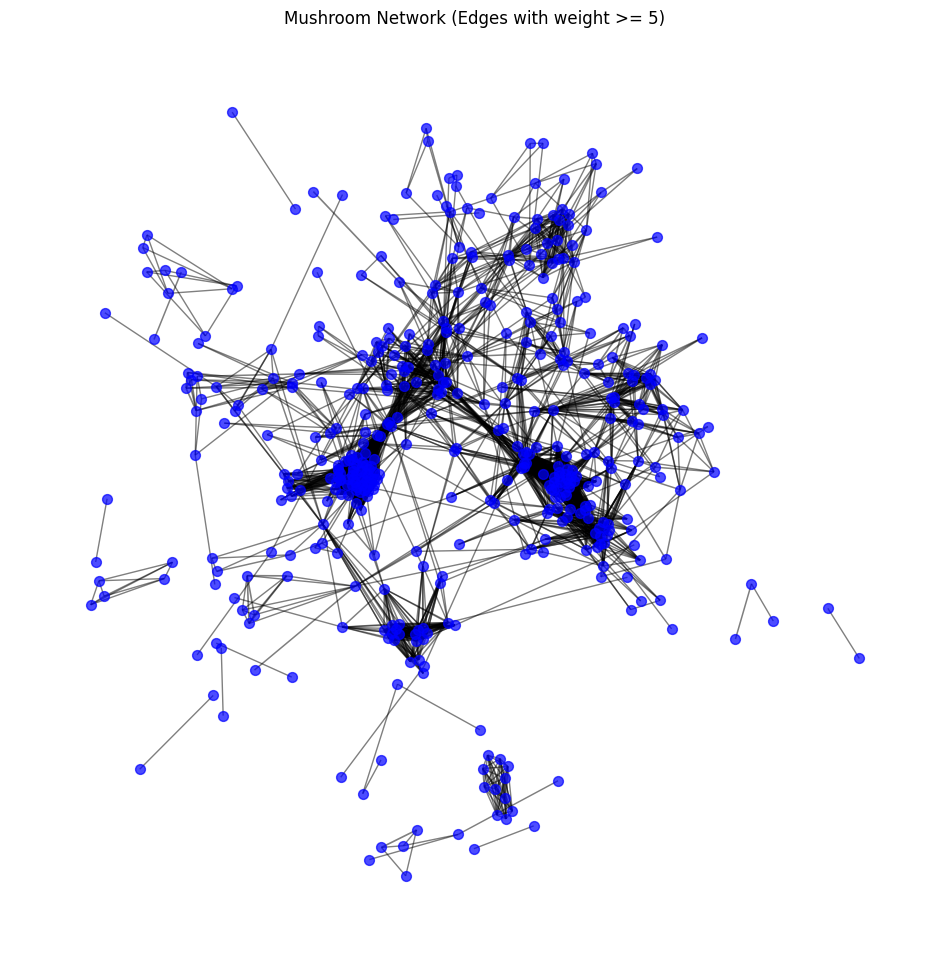

In [ ]:
# Plot the network using spring layout size the nodes by their views_all_time attribute

In [104]:
import numpy as np
import networkx as nx
from fa2 import ForceAtlas2
import plotly.graph_objects as go


In [107]:
import numpy as np
import networkx as nx
import plotly.graph_objects as go

# -------------------------------------------------------
# 1. Spring layout (NetworkX built in)
# -------------------------------------------------------

# tweak k depending on density. Smaller k means more compact layout.
pos = nx.spring_layout(H, k=0.25, iterations=300, seed=4, weight="weight")

# -------------------------------------------------------
# 2. Node positions and sizes
# -------------------------------------------------------

names = list(H.nodes())

x_nodes = [pos[n][0] for n in names]
y_nodes = [pos[n][1] for n in names]

views = [
    max(1, H.nodes[n].get("views_all_time", 1))
    for n in names
]

sizes = np.interp(
    [np.log10(v) for v in views],
    (min(np.log10(v) for v in views), max(np.log10(v) for v in views)),
    (6, 22)
)

# -------------------------------------------------------
# 3. Optional community detection (Louvain)
# -------------------------------------------------------

try:
    import community as community_louvain
    partition = community_louvain.best_partition(H)
    communities = [partition[n] for n in names]
except:
    communities = [0 for _ in names]

unique_comms = sorted(set(communities))

palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
color_map = {c: palette[i % len(palette)] for i, c in enumerate(unique_comms)}
node_colors = [color_map[c] for c in communities]

# -------------------------------------------------------
# 4. Prepare edges for Plotly
# -------------------------------------------------------

edge_x = []
edge_y = []

for u, v in H.edges():
    edge_x += [pos[u][0], pos[v][0], None]
    edge_y += [pos[u][1], pos[v][1], None]

# -------------------------------------------------------
# 5. Build Plotly figure (same style you wanted)
# -------------------------------------------------------

fig = go.Figure()

# Edges
fig.add_trace(go.Scatter(
    x=edge_x,
    y=edge_y,
    mode="lines",
    line=dict(width=0.5, color="#d0d0d0"),
    hoverinfo="none",
    showlegend=False
))

# Nodes
fig.add_trace(go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode="markers",
    marker=dict(
        size=sizes,
        color=node_colors,
        opacity=0.9,
        line=dict(width=0.5, color="white")
    ),
    text=[
        f"<b>{H.nodes[n].get('mushroom', n)}</b>"
        f"<br>views: {H.nodes[n].get('views_all_time', 0)}"
        f"<br>community: {c}"
        for n, c in zip(names, communities)
    ],
    hovertemplate="%{text}<extra></extra>",
    showlegend=False
))

# Legend for communities
for comm in unique_comms:
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode="markers",
        marker=dict(size=10, color=color_map[comm]),
        legendgroup=str(comm),
        showlegend=True,
        name=f"Community {comm}"
    ))

# Layout
fig.update_layout(
    title="Spring Layout Network (sized by views_all_time)",
    width=1100,
    height=700,
    title_x=0.5,
    showlegend=True,
    margin=dict(l=0, r=0, t=40, b=0),
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(showgrid=False, zeroline=False, visible=False),
    yaxis=dict(showgrid=False, zeroline=False, visible=False),
    legend=dict(
        title="Communities",
        orientation="v",
        yanchor="top",
        y=0.98,
        xanchor="right",
        x=0.98,
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="lightgray",
        borderwidth=1
    )
)

fig.show()
